# Mod4 - L2: Chi-Squared and T-Distributions

## Chi-Squared Distribution

### Definition
- Special case of gamma distribution
- If X ~ $\Gamma(n/2, 1/2)$, then $X$ follows $χ²$ distribution with n degrees of freedom
- Alternative notation: $\Gamma(n/2, 2)$ due to different parameterizations

### Properties
1. Mean = $n$ (degrees of freedom)
2. Variance = $2n$
3. Shape: 
   - Asymptote at 0
   - Right-skewed
   - Extends to infinity

### Key Theorems
1. **Sum of Independent χ²**:
   - If $(X₁,...,Xₖ)$ are independent $χ²$ variables
   - Each with degrees of freedom $nᵢ$
   - Then $∑Xᵢ$ ~ $χ²(∑nᵢ)$

2. **Squared Standard Normal**:
   - If $Z$ ~ $N(0,1)$
   - Then $Z²$ ~ $χ²(1)$

## T-Distribution

### Construction
1. Let $Z$ ~ $N(0,1)$
2. Let $W$ ~ $χ²(n)$ independent of $Z$
3. Then $T = Z/(√(W/n))$ follows t-distribution with $n$ degrees of freedom

### Properties
1. Symmetric about 0
2. Mean = 0 (when $n > 1$)
3. Variance = $n/(n-2)$ (when $n$ > 2)
4. Shape:
   - Bell-curved like normal
   - Heavier tails than normal
   - Approaches normal as $n → ∞$

## Applications to Sample Variance

### Key Results
1. For normal samples with unknown variance:
   - $(n-1)S²/σ²$ ~ $χ²(n-1)$
   - Where $S²$ is sample variance
   - $σ²$ is population variance

2. For large samples:
   - $S²$ is consistent estimator of $σ²$
   - Can use $S²$ in place of $σ²$ for confidence intervals

### Important Notes
- T-distribution crucial for small samples with unknown variance
- $χ²$ distribution important for variance-based inference
- Both distributions fundamental for confidence intervals and hypothesis testing

## Examples & Visualisations
### Section 1

Sample variance: 3.850
Test statistic: 27.910
95% CI for chi-square: (16.047, 45.722)
Is test statistic in expected range? TRUE


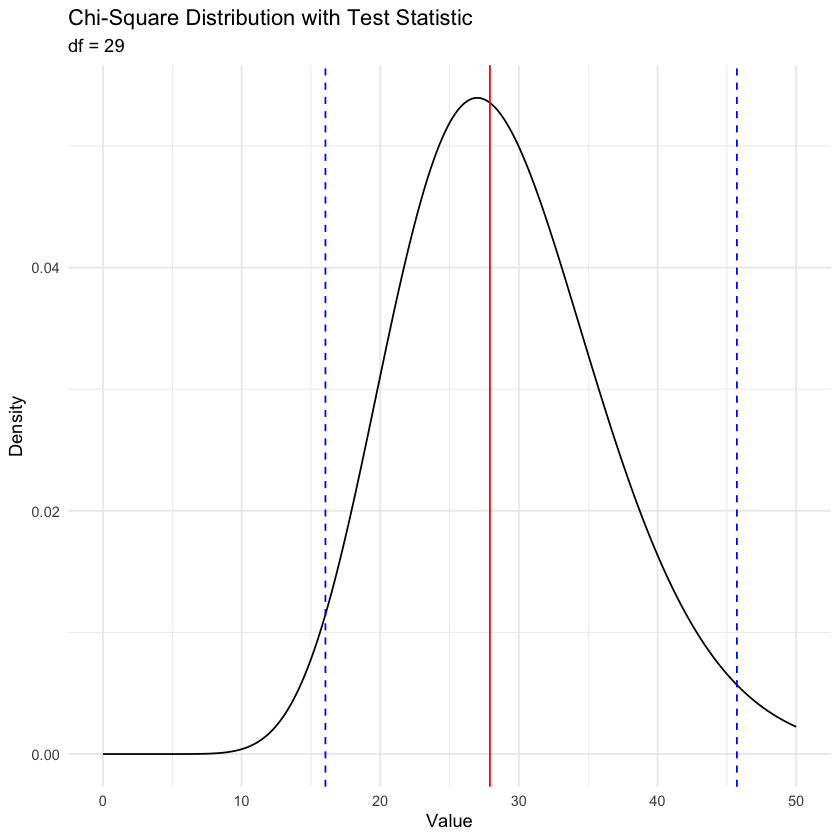

In [1]:
# Sample Variance and Chi-Square Relationship
# For normal samples: (n-1)S²/σ² ~ χ²(n-1)

# Set parameters
n <- 30               # sample size
true_sigma2 <- 4      # true population variance
mu <- 10              # population mean

# Generate sample and calculate statistics
set.seed(123)
x <- rnorm(n, mean=mu, sd=sqrt(true_sigma2))
sample_var <- var(x)

# Calculate test statistic
test_stat <- (n-1) * sample_var / true_sigma2

# Compare with chi-square distribution
alpha <- 0.05
chi_lower <- qchisq(alpha/2, df=n-1)
chi_upper <- qchisq(1-alpha/2, df=n-1)

# Visualize
library(ggplot2)

chi_x <- seq(0, 50, length.out=1000)
chi_density <- dchisq(chi_x, df=n-1)

ggplot() +
  geom_line(aes(x=chi_x, y=chi_density)) +
  geom_vline(xintercept=test_stat, color="red") +
  geom_vline(xintercept=c(chi_lower, chi_upper), linetype="dashed", color="blue") +
  labs(title="Chi-Square Distribution with Test Statistic",
       subtitle=paste("df =", n-1),
       x="Value",
       y="Density") +
  theme_minimal()

# Print results
cat(sprintf("Sample variance: %.3f\n", sample_var))
cat(sprintf("Test statistic: %.3f\n", test_stat))
cat(sprintf("95%% CI for chi-square: (%.3f, %.3f)\n", chi_lower, chi_upper))
cat(sprintf("Is test statistic in expected range? %s\n", 
    test_stat >= chi_lower && test_stat <= chi_upper))

### Section 2
The same formula can also be used to solve for 'n', the number of samples, e.g. to determine how many samples are needed if all other test parameters are given.

*What would an example for that look like?

1. Rearrange formula $(n-1)S²/σ²$ ~ $χ²(n-1)$ to solve for $n$

2. Create function to find minimum $n$ given:

- (a) Desired confidence level $(1-\alpha)$
- (b) Maximum allowable error margin
- (c) Population variance estimate
- (d) Sample variance estimate

3. Implement iterative solution since n appears in both degrees of freedom and formula

4. Add visualization of relationship

Minimum sample size needed: 30


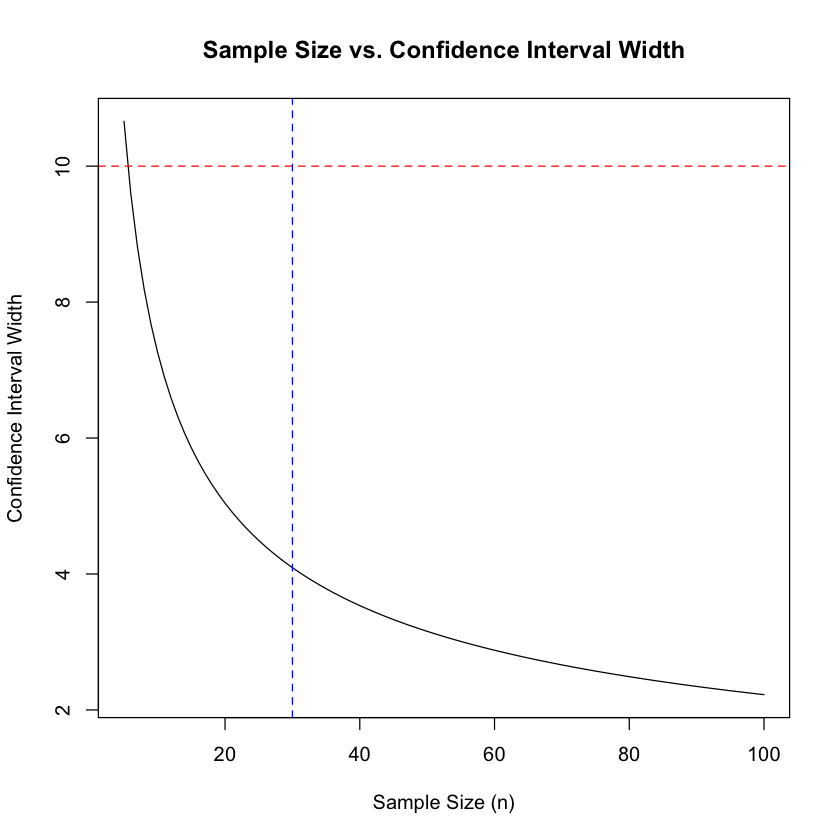

In [4]:
# Function to find minimum sample size needed
find_min_sample_size <- function(alpha = 0.05,     # significance level
                               margin = 0.5,        # maximum allowable error
                               sigma2 = 4,          # population variance
                               conf_width = 10) {     # desired confidence interval width
    
    # Initial guess for n (start with 30 as rule of thumb)
    n <- 30
    found <- FALSE
    
    while (!found && n <= 1000) {  # Set upper limit to prevent infinite loop
        # Calculate critical values
        chi_lower <- qchisq(alpha/2, df=n-1)
        chi_upper <- qchisq(1-alpha/2, df=n-1)
        
        # Calculate interval width
        width <- sigma2 * (chi_upper - chi_lower)/(n-1)
        
        if (width <= conf_width) {
            found <- TRUE
        } else {
            n <- n + 1
        }
    }
    
    return(n)
}

# Example usage
alpha <- 0.05              # 95% confidence
margin <- 0.5             # Maximum error of 0.5
sigma2 <- 4               # Assumed population variance
conf_width <- 10           # Desired width of confidence interval

n <- find_min_sample_size(alpha, margin, sigma2, conf_width)

# Visualize relationship between n and interval width
ns <- 5:100
widths <- sapply(ns, function(n) {
    chi_upper <- qchisq(1-alpha/2, df=n-1)
    chi_lower <- qchisq(alpha/2, df=n-1)
    sigma2 * (chi_upper - chi_lower)/(n-1)
})

plot(ns, widths, type="l", 
     xlab="Sample Size (n)", 
     ylab="Confidence Interval Width",
     main="Sample Size vs. Confidence Interval Width")
abline(h=conf_width, col="red", lty=2)
abline(v=n, col="blue", lty=2)

cat(sprintf("Minimum sample size needed: %d\n", n))

This code shows how to find the minimum sample size needed to achieve a specified confidence interval width for the variance estimate. The relationship between sample size and interval width is non-linear, with diminishing returns as sample size increases.

## Next lesson

(refer to [mod4_summarytranscript_L3_t_distrib_and_confid_intervals_lecture_notes.ipynb](mod4_summarytranscript_L3_t_distrib_and_confid_intervals_lecture_notes.ipynb))